In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv("Zoo.csv")

In [14]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
data.shape

(101, 18)

In [16]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [17]:
data["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [18]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='object':
        colname.append(x)
colname

['animal name']

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature animal name
mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'fruitbat': 26, 'giraffe': 27, 'girl': 28, 'gnat': 29, 'goat': 30, 'gorilla': 31, 'gull': 32, 'haddock': 33, 'hamster': 34, 'hare': 35, 'hawk': 36, 'herring': 37, 'honeybee': 38, 'housefly': 39, 'kiwi': 40, 'ladybird': 41, 'lark': 42, 'leopard': 43, 'lion': 44, 'lobster': 45, 'lynx': 46, 'mink': 47, 'mole': 48, 'mongoose': 49, 'moth': 50, 'newt': 51, 'octopus': 52, 'opossum': 53, 'oryx': 54, 'ostrich': 55, 'parakeet': 56, 'penguin': 57, 'pheasant': 58, 'pike': 59, 'piranha': 60, 'pitviper': 61, 'platypus': 62, 'polecat': 63, 'pony': 64, 'porpoise': 65, 'puma': 66, 'pussycat': 67, 'raccoon': 68, 'reindeer': 69, 'rhea': 70, '

In [20]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [21]:
x = data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']]

In [23]:
y = data[['animal name']]

In [25]:
x.shape

(101, 17)

In [26]:
y.shape

(101, 1)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(x_train))),
                                metric = 'euclidean')

In [30]:
model_KNN.fit(x_train,y_train)

c:\Users\AKSHAY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [31]:
y_pred = model_KNN.predict(x_test)
print(list(zip(y_test,y_pred)))

[('animal name', 16)]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report')

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

c:\Users\AKSHAY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AKSHAY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AKSHAY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AKSHAY\anaconda3\Lib\site-packages\sklearn\metrics\

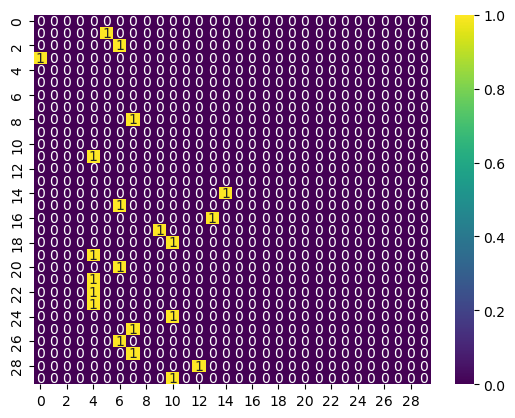

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()